In [ ]:
* datasets.load_iris()의 데이터에서 sepal.width, sepal.length를 사용하여 KNeighborsClassifier 모델을 정의하고,
  9,3값이 들어간 경우, 예측하시오. 분류(0:Setosa, 1:Versicolour, 2:Virginica)

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn import neighbors

In [23]:
iris = datasets.load_iris()
iris.keys()   # dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])
type(iris)   # sklearn.utils.Bunch
iris.feature_names #   # ['sepal length (cm)',
                       # 'sepal width (cm)',
                       # 'petal length (cm)',
                       # 'petal width (cm)']
            
iris.target_names  # array(['setosa', 'versicolor', 'virginica'], dtype='<U10')
iris.target  # 0 ~ 2 값

ix = iris.data[:, :2]   # 0 = sepal length (cm), 1 = sepal width (cm)
iy = iris.target

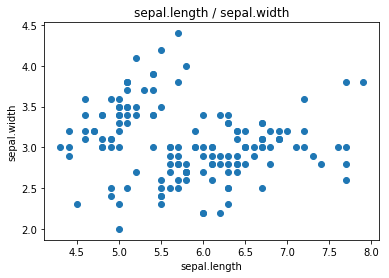

In [25]:
# 데이터를 그래프로 나타내보기
plt.figure()
plt.scatter(ix[:,0], ix[:,1])   #  x 값은 sepal length  / y 값은 sepal width 
plt.title("sepal.length / sepal.width")
plt.ylabel("sepal.width")
plt.xlabel("sepal.length")
plt.show()

In [26]:
k = 6

nn = neighbors.KNeighborsClassifier(k, weights="distance")
nn.fit(ix, iy)

nn.predict([[9,3]]) # 0: Setosa, 1:Versicolour, 2:Virginica
# array([2]) 가 나왔으므로 Virginica

array([2])

In [ ]:
* TestData.csv를 사용하여 1.94, 80, 20이 입력된 경우, 예측하시오.

In [29]:
import numpy as np
import pandas as pd
from sklearn import neighbors

In [30]:
data = pd.read_csv("TestData.csv")
data

,Height,Weight,Age,Class
0,1.70,65,20,Programmer
1,1.90,85,33,Builder
2,1.78,76,31,Builder
3,1.73,74,24,Programmer
4,1.81,75,35,Builder
5,1.73,70,75,Scientist
6,1.80,71,63,Scientist
7,1.75,69,25,Programmer


In [56]:
x = data[['Height', 'Weight', 'Age']].values
y = data['Class'].values
type(x), type(y)   # (numpy.ndarray, numpy.ndarray)

(numpy.ndarray, numpy.ndarray)

In [51]:
k = 3
nn = neighbors.KNeighborsClassifier(k, weights="distance")
nn.fit(x, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=3, p=2,
           weights='distance')

In [52]:
nn.predict([[1.94,80,20]])    # array(['Programmer'], dtype=object)

array(['Programmer'], dtype=object)

In [ ]:
* datasets.load_brest_cancer()를 사용하여 모델을 정의하고, accuracy_score를 구하시오.

In [66]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn import svm   # 서포트 벡터 머신

In [67]:
cancer = datasets.load_breast_cancer()
cancer.target_names     # array(['malignant', 'benign'], dtype='<U9')   0 : 악성  1 : 음성

xtrain, xtest, ytrain, ytest = train_test_split(cancer.data, cancer.target, test_size = 0.3, random_state=0)


In [68]:
clf = svm.SVC(kernel='linear')

In [69]:
clf.fit(xtrain, ytrain)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='linear', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

In [70]:
yResult = clf.predict(xtest)

In [78]:
from sklearn import metrics  # 측정항목

print("Accuracy Score :", metrics.accuracy_score(ytest, yResult))
print("Precision Score :", metrics.precision_score(ytest, yResult))
print("Recall_Score :", metrics.recall_score(ytest, yResult))
print("F1_Score : ", metrics.f1_score(ytest, yResult))

Accuracy Score : 0.9590643274853801
Precision Score : 0.9809523809523809
Recall_Score : 0.9537037037037037
F1_Score :  0.9671361502347416


In [ ]:
* datasets.load_digits()를 사용하여 모델을 정의하고, accuracy_score를 구하시오.

In [97]:
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn import metrics
from sklearn import svm

In [96]:
digits = datasets.load_digits()
digits.target.shape   # (1797,)
digits.data.shape     # (1797, 64)
digits.images.shape   # (1797, 8, 8)    이미지를 보여줄 때 8 x 8 형식으로 보여주기 위해서 이렇게 나온듯
                      # 숫자의 크기는 밝기를 나타냄
digits.target_names   # array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9])  숫자 0 ~ 9까지를 나타냄

array([[ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.],
       [ 0.,  0., 13., 15., 10., 15.,  5.,  0.],
       [ 0.,  3., 15.,  2.,  0., 11.,  8.,  0.],
       [ 0.,  4., 12.,  0.,  0.,  8.,  8.,  0.],
       [ 0.,  5.,  8.,  0.,  0.,  9.,  8.,  0.],
       [ 0.,  4., 11.,  0.,  1., 12.,  7.,  0.],
       [ 0.,  2., 14.,  5., 10., 12.,  0.,  0.],
       [ 0.,  0.,  6., 13., 10.,  0.,  0.,  0.]])

In [100]:
clf = svm.SVC()

x, y = digits.data[:-10], digits.target[:-10]

clf.fit(x,y)

C:\Users\Administrator\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
  kernel='rbf', max_iter=-1, probability=False, random_state=None,
  shrinking=True, tol=0.001, verbose=False)

array([9])

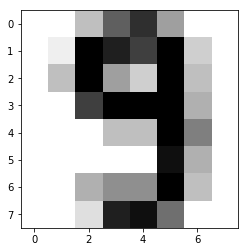

In [107]:
# 숫자 이미지 보이기
plt.imshow(digits.images[-5], cmap=plt.cm.gray_r)    # images[-5]에 위치한 값은 숫자 9를 나타냄
rResult = clf.predict(digits.data[-5].reshape(1,-1))
rResult   # array([9])     예측 값으로 9가 나옴

In [108]:
print("Accuracy_Score : ", metrics.accuracy_score(rResult, digits.target[-5].reshape(1,-1)))    # 1.0

Accuracy_Score :  1.0
